# value_noise log exploration
Set `run_id` to the directory under `log/` that contains your `value_noise` simulation output. This notebook loads summary stats, visualizes the fundamental path, and inspects specific agent logs (market maker, value agent, noise agent).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
run_id = 'value_noise_log'  # TODO: replace with actual run directory name
log_dir = Path('..') / 'log' / run_id
sorted(log_dir.iterdir())[:10]

[PosixPath('../log/value_noise_log/ExchangeAgent0.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent1.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent10.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent100.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent11.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent12.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent13.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent14.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent15.bz2'),
 PosixPath('../log/value_noise_log/NoiseAgent16.bz2')]

## Summary log

In [2]:
summary = pd.read_pickle(log_dir / 'summary_log.bz2')
wide_summary = (summary
                .pivot_table(index=['AgentID', 'AgentStrategy'],
                             columns='EventType', values='Event', aggfunc='first'))
wide_summary['PNL'] = wide_summary['ENDING_CASH'] - wide_summary['STARTING_CASH']
wide_summary.reset_index().head(20)

EventType,AgentID,AgentStrategy,ENDING_CASH,FINAL_CASH_POSITION,FINAL_VALUATION,STARTING_CASH,PNL
0,1,NoiseAgent,9999952.0,5200000.0,-0.480000,10000000.0,-48.0
1,2,NoiseAgent,10000000.0,12500000.0,0.250000,10000000.0,0.0
2,3,NoiseAgent,9999808.0,12400384.0,0.240038,10000000.0,-192.0
3,4,NoiseAgent,10000000.0,7199888.0,-0.280011,10000000.0,0.0
4,5,NoiseAgent,10000000.0,5299577.0,-0.470042,10000000.0,0.0
5,6,NoiseAgent,9999952.0,14800384.0,0.480038,10000000.0,-48.0
6,7,NoiseAgent,10000000.0,6599184.0,-0.340082,10000000.0,0.0
7,8,NoiseAgent,9999969.0,13099969.0,0.309997,10000000.0,-31.0
8,9,NoiseAgent,9999962.0,6199810.0,-0.380019,10000000.0,-38.0
9,10,NoiseAgent,9999790.0,14200000.0,0.420000,10000000.0,-210.0


### Aggregate P&L by strategy

In [3]:
wide_summary.groupby(level=1)['PNL'].describe()

,count,mean,std,min,25%,50%,75%,max
AgentStrategy,,,,,,,,
NoiseAgent,100.0,-35.06,54.856989,-280.0,-43.25,-10.0,0.0,0.0
ValueAgent 101,1.0,1694.00,NaN,1694.0,1694.00,1694.0,1694.0,1694.0
ValueAgent 102,1.0,280.00,NaN,280.0,280.00,280.0,280.0,280.0
ValueAgent 103,1.0,1218.00,NaN,1218.0,1218.00,1218.0,1218.0,1218.0
ValueAgent 104,1.0,532.00,NaN,532.0,532.00,532.0,532.0,532.0
...,...,...,...,...,...,...,...,...
ValueAgent 146,1.0,-480.00,NaN,-480.0,-480.00,-480.0,-480.0,-480.0
ValueAgent 147,1.0,589.00,NaN,589.0,589.00,589.0,589.0,589.0
ValueAgent 148,1.0,30.00,NaN,30.0,30.00,30.0,30.0,30.0


## Fundamental path

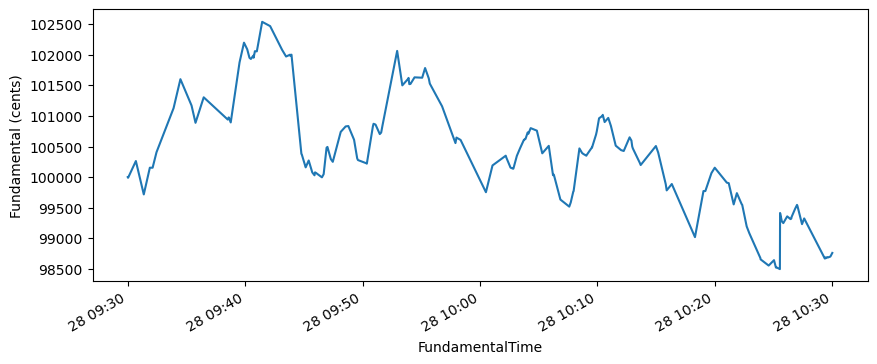

In [4]:
fundamental = pd.read_pickle(log_dir / 'fundamental_JPM.bz2').reset_index()
fundamental.plot(x='FundamentalTime', y='FundamentalValue', legend=False, figsize=(10,4))
plt.ylabel('Fundamental (cents)')
plt.show()

## Inspect specific agents

In [15]:
value_agent = load_agent_log('ValueAgent101.bz2')
print(value_agent.shape)
value_agent.head(50)

(45, 2)


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,ValueAgent 101
NaT,STARTING_CASH,100000
2019-06-28 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 100000}
2019-06-28 09:30:01.004671044,BID_DEPTH,[]
2019-06-28 09:30:01.004671044,ASK_DEPTH,[]
2019-06-28 09:30:01.004671044,IMBALANCE,"[0, 0]"
2019-06-28 09:30:02.009342067,HOLDINGS_UPDATED,"{'CASH': -3100000, 'JPM': 32}"
2019-06-28 09:30:03.009342067,HOLDINGS_UPDATED,"{'CASH': -3800000, 'JPM': 39}"
2019-06-28 09:30:04.009342067,HOLDINGS_UPDATED,"{'CASH': -4600000, 'JPM': 47}"


In [10]:
noise_agent = load_agent_log('NoiseAgent1.bz2')
print(noise_agent.shape)
noise_agent

(17, 2)


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,NoiseAgent
NaT,STARTING_CASH,10000000
2019-06-28 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:01.011619974,BID_DEPTH,[]
2019-06-28 09:30:01.011619974,ASK_DEPTH,[]
2019-06-28 09:30:01.011619974,IMBALANCE,"[0, 0]"
2019-06-28 09:42:49.193264094,BID_DEPTH,"[(99999, 98)]"
2019-06-28 09:42:49.193264094,ASK_DEPTH,"[(100000, 15)]"
2019-06-28 09:42:49.193264094,IMBALANCE,"[98, 15]"
